In [1]:
import pandas as pd
import numpy as np

# IO Tools 

I've been using the basic IO tools for a while now, especially `.read_csv()`. Here I will just explore some of the features I've been wondering about. 

Parsing dates: Importing some weight data from my personal records...

In [2]:
df_needsformatting = pd.read_csv('weight.csv')

In [3]:
df_needsformatting.head()

,Dec 17,196.0
0,Dec 18,196.2
1,Dec 19,195.0
2,Dec 20,194.8
3,Dec 21,194.4
4,Dec 22,196.0


What I want, is to import the data with the date (current first column) as the index and the weight as the one and only column, with the column header "weight". 

In [4]:
df = pd.read_csv('weight.csv', index_col=0, names=["weight"])

In [5]:
df.head()

,weight
Dec 17,196.0
Dec 18,196.2
Dec 19,195.0
Dec 20,194.8
Dec 21,194.4


Better, but I now want the index to be Date objects. 

In [6]:
df2 = pd.read_csv('weight.csv', index_col=0, names=["weight"], parse_dates=True, infer_datetime_format=True)

In [7]:
df2.head()

,weight
Dec 17,196.0
Dec 18,196.2
Dec 19,195.0
Dec 20,194.8
Dec 21,194.4


So it seems like this won't work unless the "dates" here are reasonably close to datetime strings in the first place. So I need to convert "Dec 17" to 2017-12-27 and so on. Sounds like I need to map a function over the index. 

Let's see if I can do this and not worry about the change in year for a second. 

In [8]:
# First test out the string locations

s = 'Jan 7'
print(s[:3])   # First three characters
print(s[-2:])  # Last two characters

Jan
 7


In [9]:
def conv_date(s):
    if s[:3] == 'Dec':
        month = '12'
    else: 
        month = '01'
    return '2017-'+month+'-'+s[-2:]

In [10]:
conv_date('Dec 25')  # It works! 

'2017-12-25'

In [11]:
df.index.map(conv_date)

Index(['2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
       '2017-01- 1', '2017-01- 2', '2017-01- 3', '2017-01- 4', '2017-01- 5'],
      dtype='object')

Almost! Only thing is that dates with single digits need a 0. 

In [12]:
def conv_date(s):
    if s[:3] == 'Dec':
        month = '12'
    else: 
        month = '01'
    if s[-2] == ' ':
        day = '0'+s[-1]
    else:
        day = s[-2] + s[-1]
    return '2017-'+month+'-'+day

In [13]:
df.index.map(conv_date)

Index(['2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
       '2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05'],
      dtype='object')

In [14]:
# Now replace index with this one

df.index = df.index.map(conv_date)

In [15]:
df.head()

,weight
2017-12-17,196.0
2017-12-18,196.2
2017-12-19,195.0
2017-12-20,194.8
2017-12-21,194.4


In [16]:
df.index = pd.to_datetime(df.index)

In [17]:
df.index

DatetimeIndex(['2017-12-17', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31', '2017-01-01',
               '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

DONE. 

I could have done this in fewer lines by chaining: 

    df.index = pd.to_datetime(df.index.map(conv_date))
    
Now let's start over and do this and correct the year: 

In [18]:
# Start totally over
df = pd.read_csv('weight.csv', index_col=0, names=["weight"]) 

In [19]:
df.head()

,weight
Dec 17,196.0
Dec 18,196.2
Dec 19,195.0
Dec 20,194.8
Dec 21,194.4


In [20]:
# Updated conv_date: 

def conv_date_new(s):
    if s[:3] == 'Dec':
        month = '12'
        year = '2017'
    else: 
        month = '01'
        year = '2018'
    if s[-2] == ' ':
        day = '0'+s[-1]
    else:
        day = s[-2] + s[-1]
    return year+'-'+month+'-'+day

In [21]:
print(conv_date_new('Jan 6'))
print(conv_date_new('Dec 25'))

2018-01-06
2017-12-25


In [22]:
df.index = pd.to_datetime(df.index.map(conv_date_new))

In [23]:
df

,weight
2017-12-17,196.0
2017-12-18,196.2
2017-12-19,195.0
2017-12-20,194.8
2017-12-21,194.4
2017-12-22,196.0
2017-12-23,196.0
2017-12-24,196.6
2017-12-25,197.0
2017-12-26,196.4


SWEET - now let's play

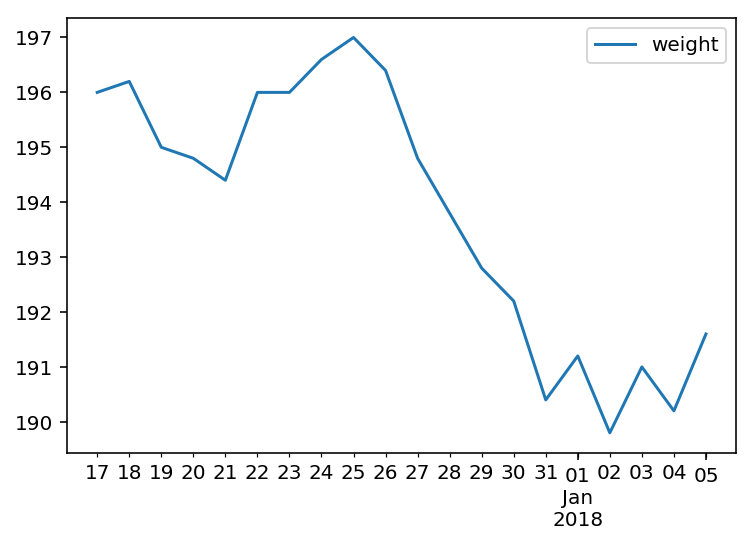

In [24]:
df.plot()

In [26]:
df[df['weight'] > 192]

,weight
2017-12-17,196.0
2017-12-18,196.2
2017-12-19,195.0
2017-12-20,194.8
2017-12-21,194.4
2017-12-22,196.0
2017-12-23,196.0
2017-12-24,196.6
2017-12-25,197.0
2017-12-26,196.4


Thinking a little more long term:

- I have a ton of data from weight dating back to Dec 2016. This is a situation where you set up and transform each year or data set separately to handle the years, then `stack` the df's on top of each other. 
- There's probably a regex that can handle the date conversions more efficiently. I should learn more. 

## Writing out data

In [27]:
print(df.to_html)

<bound method DataFrame.to_html of             weight
2017-12-17   196.0
2017-12-18   196.2
2017-12-19   195.0
2017-12-20   194.8
2017-12-21   194.4
2017-12-22   196.0
2017-12-23   196.0
2017-12-24   196.6
2017-12-25   197.0
2017-12-26   196.4
2017-12-27   194.8
2017-12-28   193.8
2017-12-29   192.8
2017-12-30   192.2
2017-12-31   190.4
2018-01-01   191.2
2018-01-02   189.8
2018-01-03   191.0
2018-01-04   190.2
2018-01-05   191.6>


In [28]:
print(df.to_csv)

<bound method DataFrame.to_csv of             weight
2017-12-17   196.0
2017-12-18   196.2
2017-12-19   195.0
2017-12-20   194.8
2017-12-21   194.4
2017-12-22   196.0
2017-12-23   196.0
2017-12-24   196.6
2017-12-25   197.0
2017-12-26   196.4
2017-12-27   194.8
2017-12-28   193.8
2017-12-29   192.8
2017-12-30   192.2
2017-12-31   190.4
2018-01-01   191.2
2018-01-02   189.8
2018-01-03   191.0
2018-01-04   190.2
2018-01-05   191.6>


In [29]:
df.to_csv('new_weights.csv')

In [30]:
df.to_dict()

{'weight': {Timestamp('2017-12-17 00:00:00'): 196.0,
  Timestamp('2017-12-18 00:00:00'): 196.2,
  Timestamp('2017-12-19 00:00:00'): 195.0,
  Timestamp('2017-12-20 00:00:00'): 194.8,
  Timestamp('2017-12-21 00:00:00'): 194.4,
  Timestamp('2017-12-22 00:00:00'): 196.0,
  Timestamp('2017-12-23 00:00:00'): 196.0,
  Timestamp('2017-12-24 00:00:00'): 196.6,
  Timestamp('2017-12-25 00:00:00'): 197.0,
  Timestamp('2017-12-26 00:00:00'): 196.4,
  Timestamp('2017-12-27 00:00:00'): 194.8,
  Timestamp('2017-12-28 00:00:00'): 193.8,
  Timestamp('2017-12-29 00:00:00'): 192.8,
  Timestamp('2017-12-30 00:00:00'): 192.2,
  Timestamp('2017-12-31 00:00:00'): 190.4,
  Timestamp('2018-01-01 00:00:00'): 191.2,
  Timestamp('2018-01-02 00:00:00'): 189.8,
  Timestamp('2018-01-03 00:00:00'): 191.0,
  Timestamp('2018-01-04 00:00:00'): 190.2,
  Timestamp('2018-01-05 00:00:00'): 191.6}}